In [2]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn import metrics
from sklearn import preprocessing
import matplotlib.pyplot as plt
import miceforest as mf
from sksurv.ensemble import RandomSurvivalForest, GradientBoostingSurvivalAnalysis
from sksurv.linear_model import CoxPHSurvivalAnalysis
from sksurv.linear_model import CoxnetSurvivalAnalysis
from sksurv.metrics import brier_score, concordance_index_censored, cumulative_dynamic_auc
from sksurv.util import Surv

In [5]:
data = pd.read_csv('C:/Users/ndong/OneDrive - Texas Tech University/Documents/Scalable Survival-DP Package/Simulation/Original Copy of Simulation/Simulation 5/Simulated Full Data.csv', index_col=0)
data_1 = data.loc[data['c_y'] == 1,]
data_0 = data.loc[data['c_y'] == 0,]
data_c1_group = [data_1.loc[data_1['z_y'] == i+1, ] for i in range(3)]
data_c0_group = [data_0.loc[data_0['z_y'] == i+1, ] for i in range(3)]
data_c1 = []
data_c0 = []
dat = []
for i in range(3):
    dat_1 = data_c1_group[i]
    dat_0 = data_c0_group[i]
    data_c1.append((np.array_split(dat_1, 20)))
    data_c0.append((np.array_split(dat_0, 20)))
for i in range(20):
    DAT = pd.concat([data_c1[0][i], data_c1[1][i], data_c1[2][i], data_c0[0][i], data_c0[1][i], data_c0[2][i]])
    DAT = DAT.reset_index(drop=True)
    DAT.to_csv(f"simulated data 5_{i+1}.csv")
    dat.append(DAT)



# X = data.drop(columns=['event', 'time_to_event', 'c_x', 'c_y'])
# y = data[['event', 'time_to_event']]
# X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)


In [4]:
dat_test = pd.concat([dat[16], dat[17], dat[18], dat[19]])
print(dat_test.shape)
dat_test.to_csv('Testing Simulated data.csv')

(1991, 56)


##### end of preprocessing

0.0    1920
1.0     493
Name: event, dtype: int64 0.0    474
1.0    121
Name: event, dtype: int64
0.0    1476
1.0     840
Name: event, dtype: int64 0.0    363
1.0    215
Name: event, dtype: int64
1.0    1058
0.0    1014
Name: event, dtype: int64 1.0    258
0.0    252
Name: event, dtype: int64
1.0    1237
0.0     303
Name: event, dtype: int64 1.0    319
0.0     77
Name: event, dtype: int64
1.0    1252
0.0      41
Name: event, dtype: int64 1.0    323
0.0      5
Name: event, dtype: int64
Brier Score: 
    year  brier score           auroc_train            auroc_test  auprc_train  \
0     1     0.124182  [0.7564939920189115]    [0.66419324137306]     0.479643   
1     3     0.202816  [0.7374687371001317]  [0.6363273660728754]     0.442338   
2     5     0.234214  [0.7328075604841275]  [0.6343653930242737]     0.388315   
3    10     0.256193  [0.7517818854301421]  [0.6638757590767786]     0.212625   
4    15     0.149435  [0.8377201860111251]  [0.8237540472018958]     0.062734   

   auprc

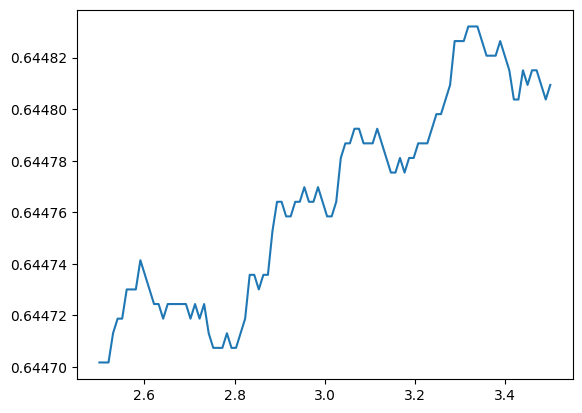

0.0    1920
1.0     493
Name: event, dtype: int64 0.0    474
1.0    121
Name: event, dtype: int64
0.0    1476
1.0     840
Name: event, dtype: int64 0.0    363
1.0    215
Name: event, dtype: int64
1.0    1058
0.0    1014
Name: event, dtype: int64 1.0    258
0.0    252
Name: event, dtype: int64
1.0    1237
0.0     303
Name: event, dtype: int64 1.0    319
0.0     77
Name: event, dtype: int64
1.0    1252
0.0      41
Name: event, dtype: int64 1.0    323
0.0      5
Name: event, dtype: int64
Brier Score: 
    year  brier score           auroc_train            auroc_test  auprc_train  \
0     1     0.124070  [0.7566610045807116]  [0.6648965490397689]     0.479664   
1     3     0.202575  [0.7375465626089459]  [0.6368271018858123]     0.442403   
2     5     0.233957  [0.7327580682999688]  [0.6347062629595961]     0.388304   
3    10     0.255997   [0.751522159330972]  [0.6636573804043935]     0.212273   
4    15     0.149373  [0.8382876524578506]   [0.824341024172728]     0.062619   

   auprc

In [13]:
est = []
RF = RandomSurvivalForest(random_state=555, oob_score=True)
clf = model_selection.RandomizedSearchCV(
    RF,
    param_distributions={'n_estimators': [30, 50, 75, 100, 150, 200],
                         'max_depth': [None, 3, 5, 7, 10, 15, 20, 50],
                         'min_samples_split': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1],
                         'min_samples_leaf': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1],
                         'max_leaf_nodes': [None, 10, 15, 20, 30, 50, 75, 100],
                         'max_samples': [0.05, 0.1, 0.2, 0.5, 0.75, 1]},
    scoring={'concordance index': concordance_index_censored}, refit='concordance index', return_train_score=True, n_jobs=4,
    n_iter=1000, random_state=555)
clf.fit(X_train_imputed, y_train1)
RFtable = pd.DataFrame(clf.cv_results_)
RFtable.to_csv('''randomrandomforesttable.csv''')
# print('''Best Parameter:\n''', clf.best_params_)
est.append(clf.best_estimator_)
print('''Best model:\n''', clf.best_estimator_)


c:\Users\ndong\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan 

Best model:
 RandomSurvivalForest(max_leaf_nodes=15, max_samples=0.75,
                     min_samples_leaf=0.0005, min_samples_split=0.1,
                     n_estimators=30, oob_score=True, random_state=555)


In [16]:
est = RandomSurvivalForest(max_leaf_nodes=15, max_samples=0.75,
                     min_samples_leaf=0.0005, min_samples_split=0.1,
                     n_estimators=30, oob_score=True, random_state=555).fit(X_train_imputed, y_train1)
survs_test = est.predict_survival_function(X_test_imputed)
survs_train = est.predict_survival_function(X_train_imputed)
pred_train = est.predict(X_train_imputed)
pred_test = est.predict(X_test_imputed)
cumu_h_train = est.predict_cumulative_hazard_function(X_train_imputed, return_array=True)
cumu_h_test = est.predict_cumulative_hazard_function(X_test_imputed, return_array=True)
XX = est.unique_times_
rec = []

for i in [1, 3, 5, 10, 15]:
    preds_test = [fn(365*i) for fn in survs_test]
    preds_train = [fn(365*i) for fn in survs_train]
    auroc_train = cumulative_dynamic_auc(y_train1, y_train1, pred_train, i*365)
    auroc_test = cumulative_dynamic_auc(y_train1, y_test1, pred_test, i*365)
    times, score = brier_score(y_train1, y_test1, preds_test, 365*i)
    y_train_true = y_train
    y_train_true['score'] = preds_train
    y_test_true = y_test
    y_test_true['score'] = preds_test
    y_true_train = y_train_true[((y_train_true['time_to_event'] <= i*365) & (y_train_true['event'] == 1))|(y_train_true['event'] == 0) & (y_train_true['time_to_event'] >= i*365)]
    y_true_test = y_test_true[
        ((y_test_true['time_to_event'] <= i * 365) & (y_test_true['event'] == 1)) | (y_test_true['event'] == 0) & (
                    y_test_true['time_to_event'] >= i * 365)]
    print(y_true_train['event'].value_counts(), y_true_test['event'].value_counts())
    precision_train, recall_train, thresholds_train = metrics.precision_recall_curve(y_true_train['event'], y_true_train['score'])
    precision_test, recall_test, thresholds_test = metrics.precision_recall_curve(y_true_test['event'],
                                                                                     y_true_test['score'])
    prc_train = pd.DataFrame({'precision_train': precision_train, 'recall_train': recall_train})
    prc_test = pd.DataFrame({'precision_test': precision_test, 'recall_test': recall_test})
    prc_train.sort_values(by='precision_train', inplace=True)
    prc_test.sort_values(by='precision_test', inplace=True)
    auprc_train = metrics.auc(prc_train['precision_train'], prc_train['recall_train'])
    auprc_test = metrics.auc(prc_test['precision_test'], prc_test['recall_test'])
    # y_train_true = (y_train['time_to_event'] > 365*i)
    # y_test_true = (y_test['time_to_event'] > 365*i)
    # fprtrain, tprtrain, threstrain = metrics.roc_curve(y_train_true, preds_train)
    # fprtest, tprtest, threstest = metrics.roc_curve(y_test_true, preds_test)
    # auroc_train = metrics.auc(fprtrain, tprtrain)
    # auroc_test = metrics.auc(fprtest, tprtest)
    # f1_train = metrics.f1_score(y_train_true, preds_train)
    # f1_test = metrics.f1_score(y_test_true, preds_test)
    rec.append([i, score[0], auroc_train[0], auroc_test[0], auprc_train, auprc_test])
brier = pd.DataFrame(rec, columns=['year', 'brier score', 'auroc_train', 'auroc_test', 'auprc_train', 'auprc_test'])
print('Brier Score: \n', brier)
C_index_test = est.score(X_test_imputed, y_test1)
C_index_train = est.score(X_train_imputed, y_train1)
print('Concordance Index:', C_index_train, C_index_test)

0.0    1920
1.0     493
Name: event, dtype: int64 0.0    474
1.0    121
Name: event, dtype: int64
0.0    1476
1.0     840
Name: event, dtype: int64 0.0    363
1.0    215
Name: event, dtype: int64
1.0    1058
0.0    1014
Name: event, dtype: int64 1.0    258
0.0    252
Name: event, dtype: int64
1.0    1237
0.0     303
Name: event, dtype: int64 1.0    319
0.0     77
Name: event, dtype: int64
1.0    1252
0.0      41
Name: event, dtype: int64 1.0    323
0.0      5
Name: event, dtype: int64
Brier Score: 
    year  brier score           auroc_train            auroc_test  auprc_train  \
0     1     0.120130  [0.7590052411396797]  [0.6733188313093419]     0.478706   
1     3     0.191134  [0.7307694665188884]  [0.6613278683548982]     0.440582   
2     5     0.218848  [0.7171200098781367]  [0.6588928337461183]     0.386033   
3    10     0.238788  [0.7473890692796259]  [0.7185447174767607]     0.228738   
4    15     0.166293  [0.8355290037048497]  [0.8299121835755302]     0.065885   

   auprc